
# Imports

In [1]:
%load_ext autotime
%matplotlib inline

In [2]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re

time: 1.05 s


In [4]:
# Reading the data
data =  pd.read_csv('Data/SimpleApproach/Imports/DataImports2016-2019GravityHSlevelComplexity.csv')
data

,refYear,partnerCode,reporterCode,distw_harmonic,contig,gdp_d,gdp_o,gdpcap_d,gdpcap_o,pop_d,...,wto_d,wto_o,refMonth,partner2Code,cmdCode,primaryValue,2HScmdCode,4HScmdCode,pci,density
0,2016,4.0,12.0,5758.0,0.0,1.946902e+07,1.560796e+08,0.562,3.844,34656.033,...,1.0,0.0,5.0,0.0,842123.0,163.030,84.0,8421.0,1.908080,0.010296
1,2016,8.0,12.0,1511.0,0.0,1.192689e+07,1.560796e+08,4.147,3.844,2876.101,...,1.0,0.0,8.0,0.0,842123.0,47.290,84.0,8421.0,1.908080,0.010296
2,2016,8.0,12.0,1511.0,0.0,1.192689e+07,1.560796e+08,4.147,3.844,2876.101,...,1.0,0.0,10.0,0.0,842123.0,1941.390,84.0,8421.0,1.908080,0.010296
3,2016,32.0,12.0,10149.0,0.0,5.458662e+08,1.560796e+08,12.449,3.844,43847.431,...,1.0,0.0,1.0,0.0,842123.0,812.090,84.0,8421.0,1.908080,0.010296
4,2016,32.0,12.0,10149.0,0.0,5.458662e+08,1.560796e+08,12.449,3.844,43847.431,...,1.0,0.0,2.0,0.0,842123.0,4504.280,84.0,8421.0,1.908080,0.010296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90844604,2019,458.0,352.0,11271.0,0.0,3.652764e+08,2.485774e+07,11.433,68.941,31949.789,...,1.0,1.0,10.0,0.0,846721.0,11405.271,84.0,8467.0,2.672168,0.034830
90844605,2019,484.0,352.0,7308.0,0.0,1.269404e+09,2.485774e+07,9.950,68.941,127575.531,...,1.0,1.0,1.0,0.0,846721.0,966.607,84.0,8467.0,2.672168,0.034830
90844606,2019,484.0,352.0,7308.0,0.0,1.269404e+09,2.485774e+07,9.950,68.941,127575.531,...,1.0,1.0,2.0,0.0,846721.0,1010.410,84.0,8467.0,2.672168,0.034830
90844607,2019,484.0,352.0,7308.0,0.0,1.269404e+09,2.485774e+07,9.950,68.941,127575.531,...,1.0,1.0,4.0,0.0,846721.0,842.089,84.0,8467.0,2.672168,0.034830


time: 3min 14s


In [4]:
data.columns

Index(['refYear', 'partnerCode', 'reporterCode', 'distw_harmonic', 'contig',
       'gdp_d', 'gdp_o', 'gdpcap_d', 'gdpcap_o', 'pop_d', 'pop_o', 'wto_d',
       'wto_o', 'refMonth', 'partner2Code', 'cmdCode', 'primaryValue',
       '2HScmdCode', '4HScmdCode', 'pci', 'density'],
      dtype='object')

time: 2.04 ms


In [5]:
# Check for null values in the DataFrame
data.isnull().sum()

refYear                0
partnerCode            0
reporterCode           0
distw_harmonic        28
contig                28
gdp_d             440953
gdp_o             536527
gdpcap_d          440954
gdpcap_o          536527
pop_d             279500
pop_o              93110
wto_d                 29
wto_o                  1
refMonth               1
partner2Code           1
cmdCode                1
primaryValue           1
2HScmdCode             1
4HScmdCode             1
pci                    1
density                1
dtype: int64

time: 4.38 s


In [5]:
# Remove null values in the DataFrame
data.dropna(inplace=True)

time: 15.4 s


In [7]:
len(data.partnerCode.unique())

198

time: 500 ms


In [8]:
len(data.reporterCode.unique())

135

time: 452 ms


In [9]:
len(data.cmdCode.unique())

5198

time: 473 ms


In [10]:
data.shape

(89876314, 21)

time: 2.15 ms


# Correlation

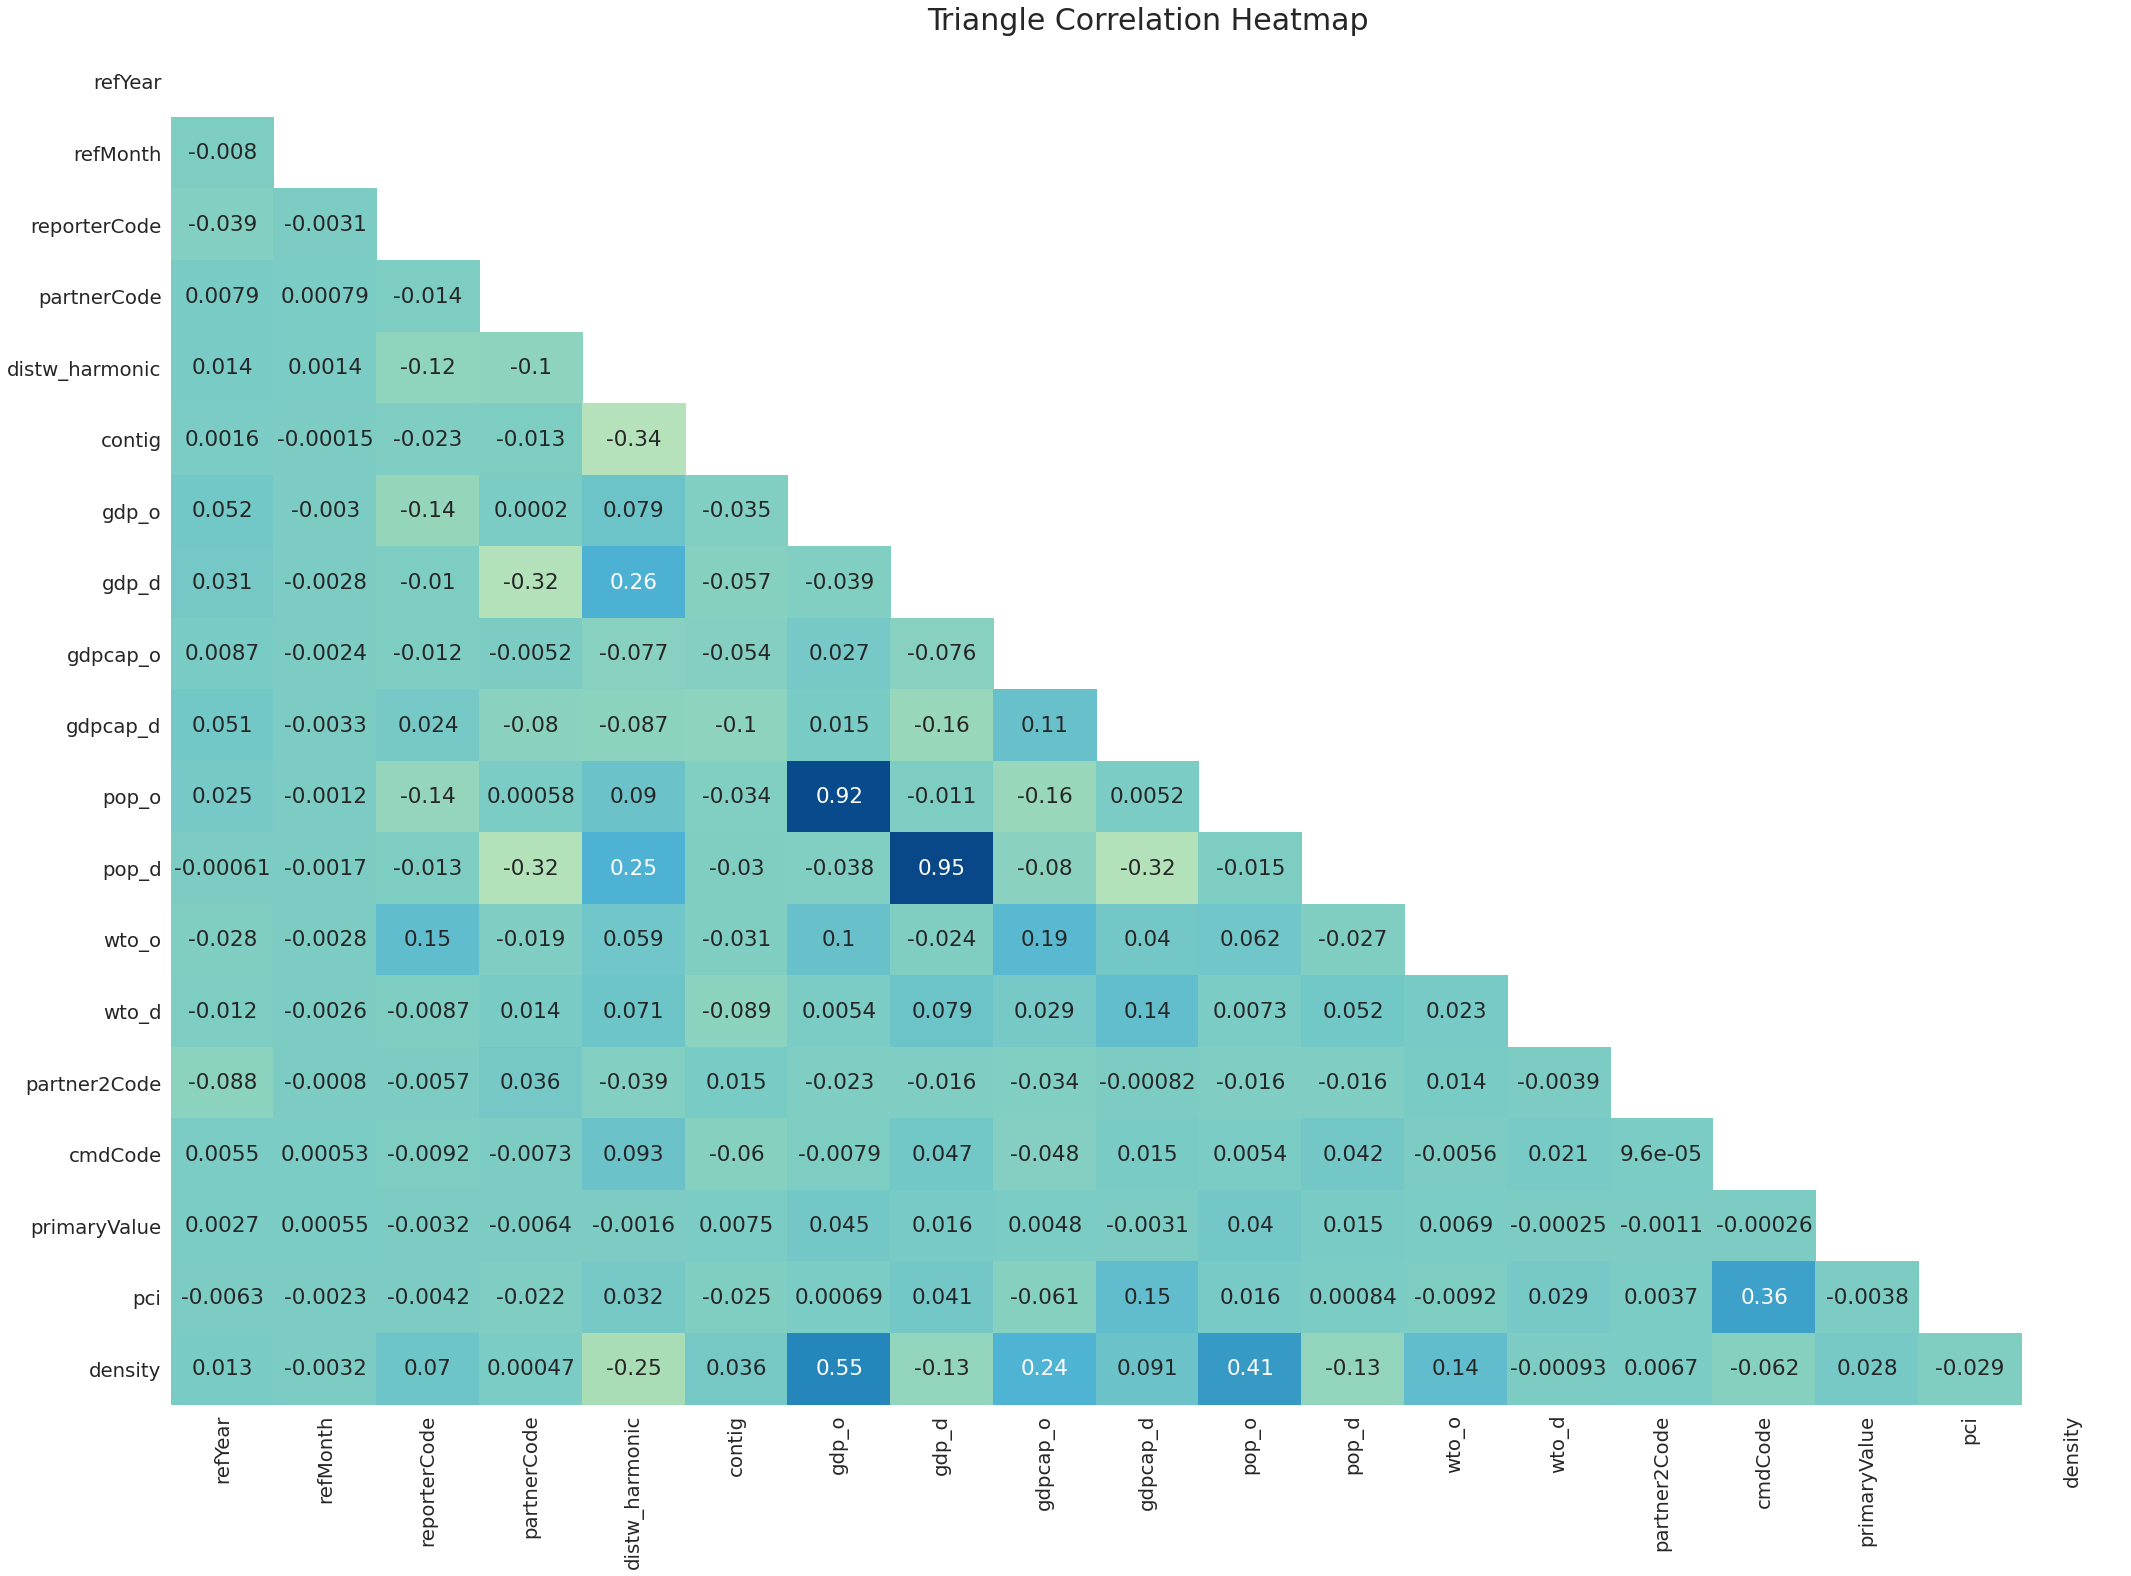

time: 1.78 s


In [7]:
plt.rcParams["figure.figsize"] = (35,25)
corr_matrix = data[['refYear','refMonth', 'reporterCode', 'partnerCode', 'distw_harmonic', 'contig',
       'gdp_o', 'gdp_d', 'gdpcap_o', 'gdpcap_d', 'pop_o', 'pop_d', 'wto_o',
       'wto_d',  'partner2Code', 'cmdCode', 'primaryValue', 'pci', 'density']].corr()
sn.set(font_scale=1.8)
# mask = np.triu(np.ones_like(corr_matrix))
ax = plt.axes()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax.set_facecolor("white")
heatmap = sn.heatmap(corr_matrix, annot=True, mask=mask, vmin=-1, vmax=1, cmap='GnBu',cbar=False)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':30}, pad=16)
# plt.show()
plt.savefig('Correlation-imports.eps', format='eps')

In [12]:
corr = corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(np.bool)).unstack().reset_index() #group together pairwise
corr.columns = ['feature_1','feature_2','corr'] #rename columns to something readable
corr[ corr['corr'].abs() > 0.4 ][corr['feature_1']!=corr['feature_2']].sort_values('corr')

/export/home/chouno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,feature_1,feature_2,corr
430,density,pop_o,0.406471
426,density,gdp_o,0.545239
216,pop_o,gdp_o,0.923612
194,pop_d,gdp_d,0.947752
372,2HScmdCode,cmdCode,0.999980
395,4HScmdCode,2HScmdCode,0.999980
393,4HScmdCode,cmdCode,1.000000


time: 20.8 ms
